# Generate radar pulse data for certain scattering distributions

Time is measured in units of $\tau$, the inverse bandwidth. However, sampling happens at a rate $\alpha /\tau$, where $\alpha\gg1$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from dataclasses import dataclass


def norm2max(arr: np.ndarray):
    """
    Normalize the signal to the bounded interval [-1, 1]
    """
    return arr / np.max(np.abs(arr))

/tmp/ipykernel_955/1203755111.py:21: RuntimeWarning: divide by zero encountered in log10
  ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))


[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Spectral Power density (dBm)'),
 Text(0.5, 1.0, 'Fourier transform of Sinc pulse'),
 (-5.0, 5.0),
 (-20.0, 20.0)]

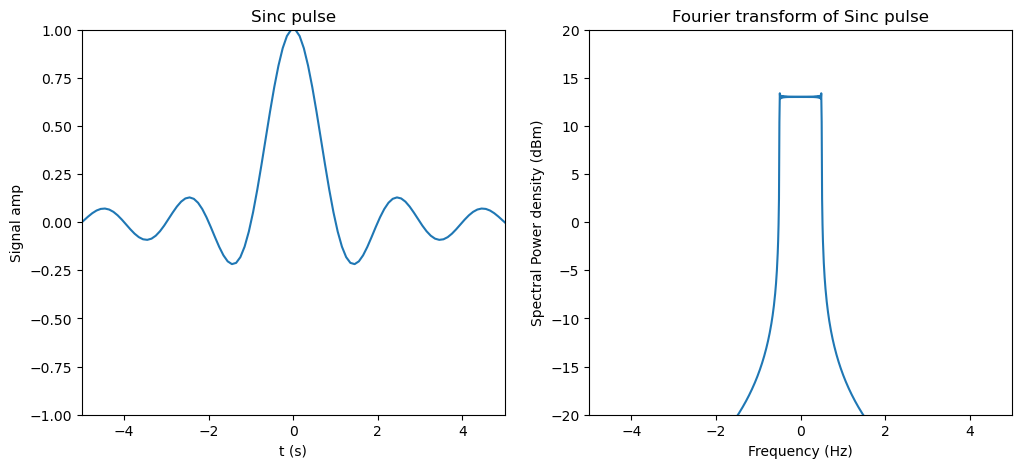

In [3]:
tau = 1.0 # s
sampling_rate = 10 # Hz
noise = 20 # dBm the noise floor of the signal. 
lims = 50 # extent of plot in units of tau
tlist = np.linspace(-lims, lims, sampling_rate*lims*2)
flist = norm2max(np.sinc(tlist))
# Compute the Fourier transform

f_sinc = fft.fft(flist)


frequencies = fft.fftfreq(tlist.size, d=1/sampling_rate)

# Shift the zero-frequency component to the center
f_sinc_shifted = fft.fftshift(f_sinc)
frequencies_shifted = fft.fftshift(frequencies)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tlist, flist) # to get unit bandwidth
ax[0].set(xlim=(-5, 5), ylim=(-1,1), xlabel='t (s)', ylabel='Signal amp', title='Sinc pulse')
ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))
ax[1].set(xlabel='Frequency (Hz)', ylabel='Spectral Power density (dBm)', title='Fourier transform of Sinc pulse', xlim=(-5,5), ylim=(-20, 20))


[Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Spectral Power density (dBm)'),
 Text(0.5, 1.0, 'Fourier transform of Sinc pulse'),
 (-1.5, 1.5),
 (-20.0, 20.0)]

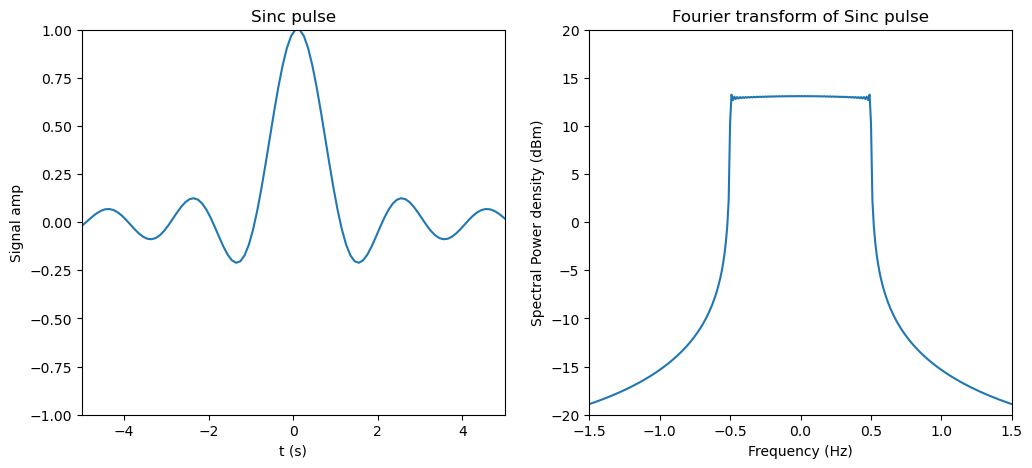

In [4]:
sep = 0.2
ret_sig = norm2max(np.sinc(tlist) + np.sinc(tlist - sep))




f_sinc = fft.fft( ret_sig)


frequencies = fft.fftfreq(tlist.size, d=1/sampling_rate)

# Shift the zero-frequency component to the center
f_sinc_shifted = fft.fftshift(f_sinc)
frequencies_shifted = fft.fftshift(frequencies)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(tlist,  ret_sig) # to get unit bandwidth
ax[0].set(xlim=(-5, 5), ylim=(-1,1), xlabel='t (s)', ylabel='Signal amp', title='Sinc pulse')
ax[1].plot(frequencies_shifted, 10*np.log10(np.abs(f_sinc_shifted)*2))
ax[1].set(xlabel='Frequency (Hz)', ylabel='Spectral Power density (dBm)', title='Fourier transform of Sinc pulse', xlim=(-1.5,1.5), ylim=(-20, 20))

In [5]:
max_sep = 5
sep_list = np.linspace(-max_sep, max_sep, 10000)
ret_sig_list = np.sinc(tlist) + np.sinc(tlist - sep_list[:, None])
ret_sig_list /= np.max(ret_sig_list, axis=1)[:, None]

data = np.hstack([ret_sig_list, np.abs(sep_list[ :, np.newaxis])])
np.savetxt('.data/sinc_data.txt', data, delimiter=',')


(-1.1, 1.1)

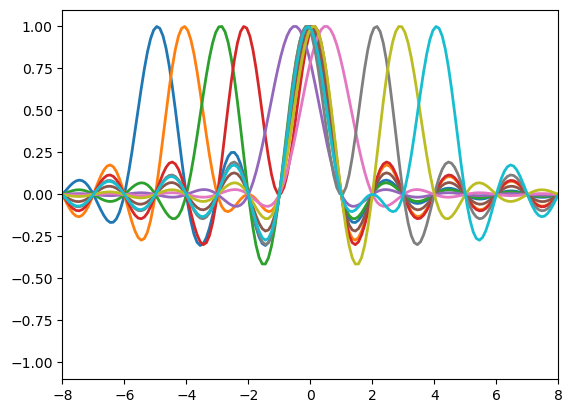

In [6]:
plt.plot(tlist, ret_sig_list.T[:, ::1000], lw=2);
plt.xlim(-8, 8)
plt.ylim(-1.1, 1.1)

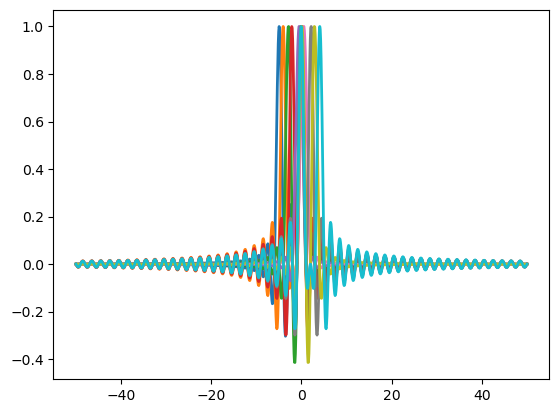

In [7]:
plt.plot(tlist, ret_sig_list.T[:, ::1000], lw=2);

# "Triangle Wave"

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


rng = np.random.default_rng()


def pulse(
    t: float,
    m: int = 10,
    omega: float = 2 * np.pi,
):
    """
    Generates the pulse to be sent out

    Parameters:
    ============

    t: time point

    m: order of decay

    omega: Bandlimit
    """
    f_n = np.polynomial.Polynomial([0, 8, 0, -14.3984, 0, 4.77612, 0, -0.82315])
    c_m = np.sinc(omega * t / (m * np.pi)) ** m
    return c_m * f_n(t)


def rec(delay, t):
    return 0.5 * (pulse(t - delay / 2) + pulse(t + delay / 2))


def norm2max(arr: np.ndarray):
    """
    Normalize the signal to the bounded interval [-1, 1]
    """
    return arr / np.max(np.abs(arr))


def noisy_signal(
    t: np.ndarray,
    delay: float,
    sigma: float = 0.01,
):
    """
    Generate a noisy signal normalized to 1
    """
    return norm2max(rec(delay=delay, t=t)) + rng.normal(scale=sigma, size=t.shape[0])


def generate_waves(
    tlist: np.ndarray,
    distances: np.ndarray,
    reflectivities: np.ndarray,
):
    """
    Generates the returned signal.

    Parameters:
    ===========

    tlist: list of times to generate return signals at

    distances: distances of scatterers

    reflectivites: reflectivites of scatterers

    """

    distances = np.asarray(distances)
    reflectivities = np.asarray(reflectivities)
    # Check equal shape
    if distances.shape != reflectivities.shape:
        raise Exception("Distances and reflectivities should have the same shape.")

    # Normalize reflectivities and distances.
    # Reflectivities should all add to 1.
    pass


/tmp/ipykernel_955/3069753344.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[(-10.0, 10.0), Text(0.5, 0, 'Time (a.u.)'), Text(0, 0.5, 'Amplitude (a.u.)')]

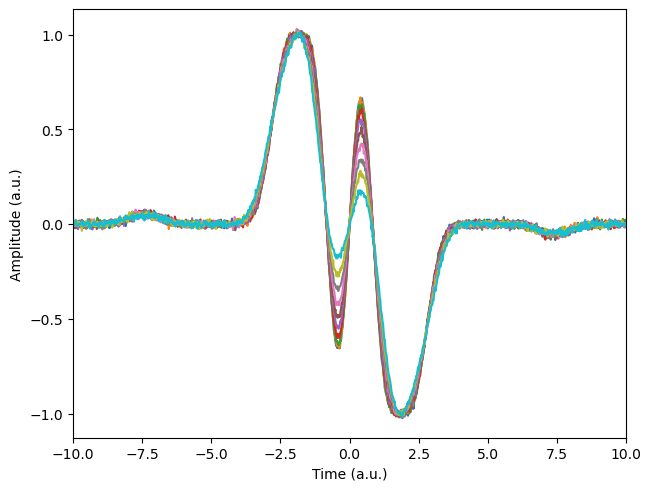

In [9]:

t = np.linspace(-10, 10, 1000)
shift_list = np.linspace(0, 0.7, 10)
ret_sigs = np.vstack([noisy_signal(t=t, delay=delay) for delay in shift_list])
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.plot(t, ret_sigs.T)
ax.set(
    xlim=(np.min(t), np.max(t)),
    xlabel="Time (a.u.)",
    ylabel="Amplitude (a.u.)",
)



# Superfunctions

In [53]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import scipy

In [ ]:
w = 2 * np.pi
m1 = 1


SampleNum = 80000
tStart = -40
tEnd = 40

t = np.linspace(tStart, tEnd, SampleNum)
dt = (tEnd - tStart) / SampleNum
Fs = 1 / dt
f = np.linspace(0, Fs, SampleNum)


sigma = 0.2

# %%

N = 8  # order of expansion and number of coefficients
order = N  # order of expansion must equal the number of coefficients


w1 = w  # beginning frequency
w2 = 2 * w  # ending frequency


dw = (w2 - w1) / N  # bandwidth


NumPoints = 14  # number of points to fit data
end = 0.25  # endpoint in time for the fit
tf = end
ti = -end
t_int = np.linspace(ti, tf, NumPoints)  # time defined on the interval


# %% Define some functions


def test(t1, coeff):
    g = np.zeros(SampleNum)
    for i in range(0, 14):
        g = g + t1 ** (i + 1) * np.absolute(coeff[i])
    return g


def Sinc(time, m1):
    w1 = w
    func = (np.sin(w1 * time / m1) / (w1 * time / m1)) ** m1
    return func


def SincSO(time, coeff):
    func = Sinc(time, m1) * test(time, coeff)
    return func


def basis(time, n):
    g = np.sin(
        (w1 + dw * n) * time
    )  # This defines the basis we use.  Sine function for odd and cosine for even functions
    return g


def D(vec):  # the derivative
    vec_shift = np.insert(vec, 0, 0)
    vec_shift = vec_shift[:-1]
    dVec = (vec - vec_shift) / dt
    return dVec


def Scatter(m, r):
    if m == "Two":
        A = np.ones(2)
        tshift = np.zeros(2)
        tshift[0] = -r
        tshift[1] = r
    elif m == "Three":
        A = np.ones(3)
        tshift = np.zeros(3)
        for i in range(0, 3):
            tshift[i] = (i - 1) * r
    elif m == "Four":
        A = np.ones(4)
        tshift = np.zeros(4)
        for i in range(0, 4):
            tshift[i] = (2 * i - 3) / 3 * r
    elif m == "Five":
        A = np.ones(5)
        tshift = np.zeros(5)
        for i in range(0, 5):
            tshift[i] = (2 * i - 4) / 4 * r
    elif m == "Six":
        A = np.ones(6)
        tshift = np.zeros(6)
        for i in range(0, 6):
            tshift[i] = (2 * i - 5) / 5 * r
    elif m == "Seven":
        A = np.ones(7)
        tshift = np.zeros(7)
        for i in range(0, 7):
            tshift[i] = (2 * i - 6) / 6 * r
    # elif m=='Plane':
    #     A=np.ones(r)
    # elif m=='Cylinder':
    #     r=2*r
    #     for i in range(1,r):  # this for loop gives the amplitudes for a cylinder
    #         theta2=np.arccos(1-i/(r))
    #         theta1=np.arccos(1-(i-1)/(r))
    #         scat[off+i]=np.sin(theta2)-np.sin(theta1)
    # elif m=='Sphere':
    #     r=2*r
    #     for i in range(1,r):  # this for loop gives the amplitudes for a cylinder
    #         theta2=np.arccos(1-i/(r))
    #         theta1=np.arccos(1-(i-1)/(r))
    #         scat[off+i]=np.sin(theta2)**2-np.sin(theta1)**2

    A = A / (np.sum(A))  # normalizes the distribution
    return A, tshift


def Composite(Amp1, ts, time, Type):
    composite = np.zeros(SampleNum)
    if Type == "Super":
        for i in range(0, len(Amp1)):
            composite = composite + Amp1[i] * SF(time - ts[i])
    elif Type == "Sinc":
        for i in range(0, len(Amp1)):
            composite = composite + Amp1[i] * Sinc(time - ts[i], m1)
    return composite


def SF(time):
    Func = 2 * t_int
    Func_ps = np.polynomial.polynomial.polyfit(t_int, Func, order)
    PerFunc = np.zeros(
        (N + 1, NumPoints)
    )  # These are the values of the basis functions over the domain of interest for each frequency
    PFps = np.zeros(
        (N + 1, order + 1)
    )  # This will be the function where the power series is approximated
    for i in range(0, N + 1):
        PerFunc[i, :] = basis(t_int, i)
        PFps[i] = np.polynomial.polynomial.polyfit(t_int, PerFunc[i, :], order)
    sol = np.linalg.solve(np.transpose(PFps), Func_ps)
    g = np.zeros(SampleNum)
    for i in range(0, N + 1):
        g = g + sol[i] * basis(time, i)
    return g


def Noise(vec):
    vec = vec + np.random.normal(0, 0.01, SampleNum)
    return vec


def Filter(vec):
    vecfftTemp = np.zeros(SampleNum)
    vecfft = np.fft.fft(vec)
    vecfftAbs = np.absolute(vecfft)
    # peaks,_=signal.find_peaks(vecfftAbs, threshold=7)
    # for i in peaks:
    #      vecfft[i+3:i+8]=0
    # print(peaks)
    vecfft[200 : SampleNum - 200] = 0
    # vecfft[0:40]=0
    # vecfft[SampleNum-40:SampleNum]=0
    vec_filtered = np.fft.ifft(vecfft)
    # plt.figure()
    # plt.plot(f,vecfftAbs)
    # #plt.plot(f,vecfft)
    # #plt.plot(f[peaks],vecfftAbs[peaks],'x')
    # plt.xlim(0,4)
    # #print('Number of peaks=',len(peaks))
    return vec_filtered


def Threshold(diff):
    threshold = np.argwhere(
        diff[point_i + int(0.1 / dt) : point_f] - diff[point_i] > 0.003
    )
    if len(threshold) > 0:
        threshold = np.min(threshold, axis=0)[0]
    else:
        threshold = 0
    return threshold


def PolynomialFit(pt1, pt2, time, time_p, vec, n):
    polynomials = np.polynomial.polynomial.polyfit(time[pt1:pt2], vec[pt1:pt2], n)
    polyfunc = np.zeros(points)
    for i in range(0, n + 1):
        polyfunc = polyfunc + polynomials[i] * time_p**i
    return polyfunc


def ThreshCross(vec):
    tvecp = np.argwhere(vec[int(SampleNum / 2) : SampleNum] >= 0.0002)
    tvecn = np.argwhere(np.absolute(vec[0 : int(SampleNum / 2)]) >= 0.0002)
    thresh_pointp = np.min(tvecp, axis=0)[0]
    thresh_pointn = np.max(tvecn, axis=0)[0]
    return thresh_pointn, thresh_pointp + int(SampleNum / 2)


def Zero(vec):
    vec_center = np.average(vec[39900:40100])
    vec = vec - vec_center
    return vec


In [11]:
def signal_power(tlist, signal):
    """
    Compute the power of the signal
    """
    return np.sum(np.abs(signal) ** 2) / (np.max(tlist) - np.min(tlist))

In [12]:
def normpower2one(tlist, signal):
    dt = tlist[1] - tlist[0]  # calculate time step
    power = np.sum(np.abs(signal)**2) * dt  # calculate total power
    return signal / np.sqrt(power)  # normalize signal power to 1


In [56]:

# %% Here we set the function
FuncTypes = ["Super", "Sinc"]
FuncType = FuncTypes[0]

if FuncType == "Super":
    F_SO = SF(t)
elif FuncType == "Sinc":
    F_SO = Sinc(t, m1)


# %% take the fft of F_SO


FSOfft = np.absolute(np.fft.fft(F_SO))
maxpoint = max(F_SO)
minpoint = min(F_SO)
Norm = F_SO[int(SampleNum / 2)]

In [44]:
normed_F_SO = normpower2one(t, F_SO)

In [45]:
signal_power(t, normed_F_SO)

12.499843749993158

(-10.0, 10.0)

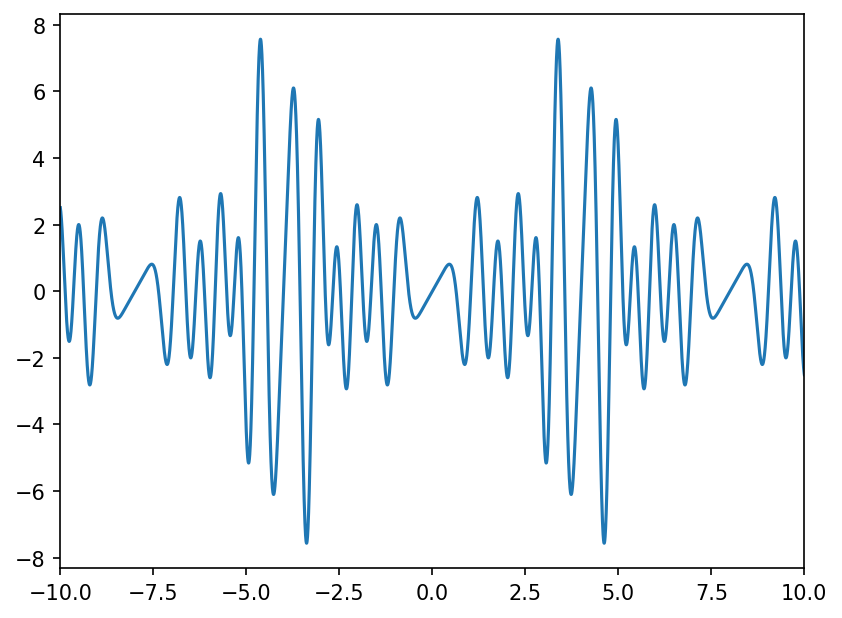

In [55]:

# %% Plot the function and its fft
plt.figure(dpi=150)
plt.plot(t,F_SO)
# plt.xlim(-0.5,0.5)
plt.xlim(-10,10)

# plt.ylim(-1, 1)
# plt.ylim(-1e-2, 1e-2)

Now, we will construct several different scattering functions. Let us first start with equally separated scatterers. We will use Gaussians of a given amplitude and width. 

In [47]:
def scatter_fn(tlist, num_scatterers, amps, locs, widths):
    """
    Generates an array with Gaussian functions.

    Parameters:
    ===========
    tlist: list of times to generate return signals at
    num_scatterers: number of Gaussians to use
    amps: amplitudes of the Gaussians
    locs: locations of the Gaussians
    widths: widths of the Gaussians
    """
    assert len(amps) == len(locs) == len(widths) == num_scatterers, "Mismatch in number of parameters and scatterers"

    result = np.zeros_like(tlist)
    for i in range(num_scatterers):
        result += amps[i] * np.exp(-0.5 * ((tlist - locs[i]) / widths[i]) ** 2)

    return result


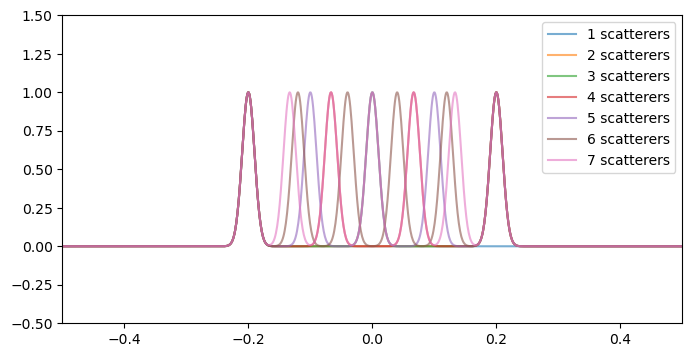

In [48]:
# num_scatterers = 7

scatter_equal  = np.asarray([scatter_fn(t, num_scatterers, np.ones(num_scatterers), np.linspace(-0.2, 0.2, num_scatterers), 1e-2*np.ones(num_scatterers)) for num_scatterers in range(1, 8)])
# scatter_equal = normpower2one(t, scatter_equal)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, scatter_equal.T, alpha = 0.6)
ax.set(xlim =(-0.5,0.5),  ylim =(-0.5, 1.5))
ax.legend([f'{i} scatterers' for i in range(1, 8)])

Now we create the composite and plot it.

In [49]:
composite = np.asarray([signal.convolve(normed_F_SO, scatterer_equal, mode='same') / sum(scatterer_equal) for scatterer_equal in scatter_equal])

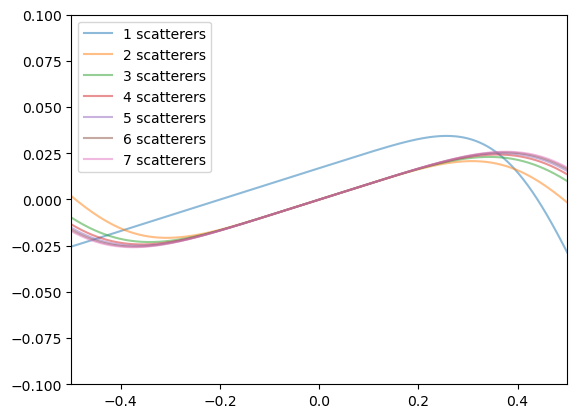

In [51]:
# composite = signal.convolve(normed_F_SO, scatter_equal, mode='same') / sum(scatter_equal)
plt.plot(t, composite.T, alpha=0.5)
plt.xlim(-0.5,0.5)
# plt.xlim(-2,2)
# plt.yscale('log')
plt.ylim(-0.1, 0.1)
# plt.ylim(-0.005, 0.005)
plt.legend([f'{i} scatterers' for i in range(1, 8)])


In [81]:
signal_power(t, composite)

0.1798961082883722

In [ ]:
dt = tlist[1] - tlist[0]  # calculate time step
    power = np.sum(np.abs(signal)**2) * dt  # calculate total power

In [ ]:

plt.figure(dpi=150,figsize=(4,2))

plt.plot(f,12.5*FSOfft/np.sum(FSOfft))

plt.xlim(0,3)

#plt.yscale('log')

plt.xlabel('f ($\sigma$)')

plt.ylabel('Amplitude (Arb Units)')


plt.legend(prop={'size': 7},loc='upper left')

#print(max(D(F_SO/Norm)))



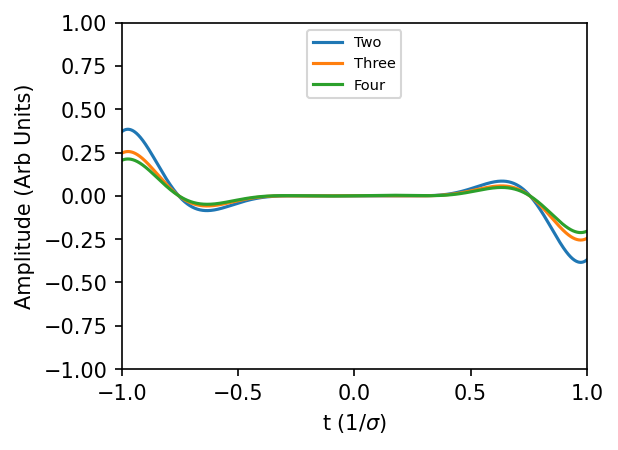

In [5]:

# %%

FuncTypes = ["Super", "Sinc"]

FuncType = FuncTypes[0]


# ScatTypes=['Four','Six','Seven','Plane','Cylinder','Sphere']#,'plane','sphere']

ScatTypes = ["Two", "Three", "Four"]

# ScatTypes=['Cylinder','Sphere']

# ScatTypes=['ThreeShift']

# ScatTypes=['Plane']

# ScatTypes=['Two']


t1 = -1

t2 = 1


NumInt = int((t2 - t1) / dt) + 1

point_i = int(SampleNum / 2 - 1 / dt)

point_f = int(SampleNum / 2 + 1 / dt)

points = 1001

t_poly = np.linspace(-1, 1, points)

maxtimes = 20

r0 = 40 * dt

N_poly = 13

plt.figure(dpi=150, figsize=(4, 3))


numshifts = 1

for u in range(0, numshifts):

    for j in ScatTypes:

        r = r0 + u * 5 * dt

        # print(r)

        Amp, ts = Scatter(j, r)

        composite = Composite(Amp, ts, t, FuncType)

        Comp_noise = Noise(composite)

        Comp_filter = Filter(Comp_noise)

        diff = F_SO - Comp_filter

        # diff=Zero(diff)

        dp = PolynomialFit(point_i, point_f, t, t_poly, diff, N_poly)

        # plt.plot(t,F_SO,linewidth=2,label='Transmitted SuperFunction')

        # plt.plot(t[39000:42001],scat, label=j)

        # plt.plot(t[39300:40700],D(F_SO)[39300:40700], label='Derivative in Linear Domain')

        plt.plot(t, diff, label=j)  # label=u*r/(numshifts*1000))

        # plt.plot(t,D(D(diff))/10)

        # plt.plot(t[thr[1]],diff[thr[1]],'x')

        # plt.plot(t[thr[1]-50:thr[1]+50],quad_fitp[thr[1]-50:thr[1]+50],linewidth=5)

        # plt.plot(t_poly,dp, label=2*r/1000)

        # plt.plot(t[point_i+thresh_start],0,'x')

        # plt.plot(t_poly[thresh_cross],0,'o')

        # plt.plot(t,Comp_noise,label='Return Composite')

        # plt.plot(t,composite,label='Noiseless Composite')

        # plt.plot(t,Comp_filter,label='Filtered Composite (SNR=12)')

        # plt.title('Depth='+str(2*r/1000))

        plt.xlim(-1, 1)

        plt.ylim(-1, 1)

        plt.xlabel("t (1/$\sigma$)")

        plt.ylabel("Amplitude (Arb Units)")

    plt.legend(prop={"size": 7}, loc="upper center")



In [6]:

# %% Here I check the uniqueness of the scatter distributions based on the level of noise

# NumTrials=100

# l2=np.zeros(NumTrials)

# NumMeas=6

# ratio2=np.zeros(NumMeas)

# ratio3=np.zeros(NumMeas)

# ratio4=np.zeros(NumMeas)

# ratio6=np.zeros(NumMeas)

# scale=10


# for j in ScatTypes:

#     for r in range(0,NumMeas):

#         r0=r*scale+5

#         for i in range(0,NumTrials):

#             r1=r0

#             r2=r0+5

#             scat1=Scatter(j,r1,1,1)

#             scat2=Scatter(j,r2,1,1)

#             composite1=Composite(scat1,F_SO)

#             composite2=Composite(scat2,F_SO)

#             Comp_noise1=Noise(composite1)

#             Comp_noise2=Noise(composite2)

#             Comp_filter1=Filter(Comp_noise1)

#             Comp_filter2=Filter(Comp_noise2)

#             diff1=F_SO-Comp_filter1

#             diff2=F_SO-Comp_filter2

#             diff1=Zero(diff1)

#             diff2=Zero(diff2)

#             dp1=PolynomialFit(point_i,point_f,t,t_poly,diff1,N_poly)

#             dp2=PolynomialFit(point_i,point_f,t,t_poly,diff2,N_poly)

#             l2[i]=np.sqrt(np.sum((dp2-dp1)**2))

#             print(j,i)

#         l2ave=np.average(l2)

#         l2std=np.std(l2)

#         if j=='Two':

#             ratio2[r]=l2ave/l2std

#         elif j=='Three':

#             ratio3[r]=l2ave/l2std

#         elif j=='Four':

#             ratio4[r]=l2ave/l2std



In [7]:

# %% Here I check the uniqueness of the scatter distributions based on the level of noise

NumTrials = 1000

l223 = np.zeros(NumTrials)

l224 = np.zeros(NumTrials)

NumMeas = 30

ratio2 = np.zeros((NumMeas, len(FuncTypes)))

ratio4 = np.zeros((NumMeas, len(FuncTypes)))


init = 100

j = 0

for FT in FuncTypes:

    if FT == "Super":

        F_SO = SF(t)

    elif FT == "Sinc":

        F_SO = Sinc(t, m1)

    for r in range(0, NumMeas):

        for i in range(0, NumTrials):

            r1 = init * dt

            r2 = (r * 2 + init) * dt

            Amp2, ts2 = Scatter("Two", r1)

            Amp3, ts3 = Scatter("Three", r2)

            Amp4, ts4 = Scatter("Four", r2)

            composite2 = Composite(Amp2, ts2, t, FT)

            composite3 = Composite(Amp3, ts3, t, FT)

            composite4 = Composite(Amp4, ts4, t, FT)

            Comp_noise2 = Noise(composite2)

            Comp_noise3 = Noise(composite3)

            Comp_noise4 = Noise(composite4)

            Comp_filter2 = Filter(Comp_noise2)

            Comp_filter3 = Filter(Comp_noise3)

            Comp_filter4 = Filter(Comp_noise4)

            diff2 = F_SO - Comp_filter2

            diff3 = F_SO - Comp_filter3

            diff4 = F_SO - Comp_filter4

            l223[i] = np.sum(np.sqrt((diff3[39000:41000] - diff2[39000:41000]) ** 2))

            l224[i] = np.sum(np.sqrt((diff4[39000:41000] - diff2[39000:41000]) ** 2))

        l223ave = np.average(l223)

        l223std = np.std(l223)

        ratio2[r, j] = l223ave / (l223std * np.sqrt(20))

        l224ave = np.average(l224)

        l224std = np.std(l224)

        ratio4[r, j] = l224ave / (l224std * np.sqrt(20))

    j = j + 1



/tmp/ipykernel_2169/3004220741.py:68: ComplexWarning: Casting complex values to real discards the imaginary part
  l223[i] = np.sum(np.sqrt((diff3[39000:41000] - diff2[39000:41000]) ** 2))
/tmp/ipykernel_2169/3004220741.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  l224[i] = np.sum(np.sqrt((diff4[39000:41000] - diff2[39000:41000]) ** 2))


KeyboardInterrupt: 

In [ ]:

# %%

inc = np.linspace(0, 2 * NumMeas / 1000, NumMeas + 1)

noisefloor = np.ones(NumMeas)

plt.figure(dpi=150, figsize=(4, 3))

plt.plot(inc[:-1] + 2 * init * dt, noisefloor, linewidth=2, label="Noise Floor")

plt.plot(
    inc[:-1] + 2 * init * dt, ratio2[:, 1], ".", linewidth=2, label="Two vs Three: Sinc"
)

plt.plot(
    inc[:-1] + 2 * init * dt, ratio4[:, 1], ".", linewidth=2, label="Two vs Four: Sinc"
)

plt.plot(
    inc[:-1] + 2 * init * dt,
    ratio2[:, 0],
    "x",
    linewidth=2,
    label="Two vs Three: Super",
)

plt.plot(
    inc[:-1] + 2 * init * dt, ratio4[:, 0], "x", linewidth=2, label="Two vs Four: Super"
)


# plt.xlim(0,.12)

plt.ylim(-1, 40)

plt.xlabel("t ($1/\sigma$)")

plt.ylabel("R")

plt.legend(prop={"size": 7}, loc="upper right")



In [ ]:

# %%

# Mat1=np.zeros((N_poly+1,N_poly+1,N_poly+1))

# Mat2=np.zeros((N_poly+1,N_poly+1))

# T=r*dt


# for i in range(0,N_poly+1):

#     for j in range(0,N_poly+1):

#         for k in range(0,j+1):

#             c=np.math.factorial(j)/(np.math.factorial(j-k)*np.math.factorial(k))

#             Mat1[i,j,j-k]=ap[j]*(-1)**k*(c*(T**(i+k+1)-(-T)**(i+k+1))/(i+k+1))

#             #print('a=',ap[j])

#             #print('T',T**(i+k+1)-(-T)**(i+k+1))


# t_s=np.zeros(N_poly+1)

# t_delta=2*T/N_poly


# for i in range(0,N_poly+1):

#     t_s[i]=-T+i*t_delta


# for i in range(0,N_poly+1):

#     for j in range(0,N_poly+1):

#         for k in range(0,j+1):

#             c=np.math.factorial(j)/(np.math.factorial(j-k)*np.math.factorial(k))

#             Mat1[i,j,j-k]=ap[j]*(-1)**k*c*t_s[i]**k


# Mat2=np.transpose(np.sum(Mat1,axis=1))


# Mat_inv=np.linalg.pinv(Mat2)

# b=np.matmul(Mat_inv,np.real(cp))


# print(b)


# %%